In [1]:
import requests
url = 'http://www.pythonchallenge.com/pc/rock/'
username = 'kohsamui'
password = 'thailand'

def get_file(fn):
    return requests.get(url+fn, auth=(username, password)).content.decode()

file_name = 'warmup.txt'
file_name = 'up.txt'
spec = get_file(file_name)

In [2]:
spec_split = list(filter(lambda x: x!=[], [x.split() for x in spec.split('\n')]))
dims = [int(x) for x in spec_split[1]]

hors = [[int(x) for x in line] for line in spec_split[3:dims[0]+3]]
vers = [[int(x) for x in line] for line in spec_split[dims[0]+4:]]

assert len(hors) == dims[0], 'len hors is not dim[0]'
assert len(vers) == dims[1], 'len vers is not dim[1]'

In [3]:
class Grid:
    def __init__(self, x, y, hors, vers):
        self.x = x
        self.y = y
        self.data = [[0]*x for _ in range(y)]
        self.hors = hors
        self.vers = vers
    
    def __str__(self):
        grid2str(self.data)
    
    def copy(self):
        return Grid(self.x, self.y, self.hors, self.vers)
    
def grid2str(data):
        out_str = ''
        for row in data:
            for el in row:
                out_str += '■ ' if el == 1 else 'X ' if el == 2 else '. '
            out_str += '\n'
        return out_str

def transpose(data):
    return [[row[i] for row in data] for i in range(len(data[0]))]

the_grid = Grid(dims[1], dims[0], hors, vers)
grid = the_grid.data
# 0 = Unknown
# 1 = True
# 2 = False

In [4]:
from PIL import Image
from IPython.display import Image as im

In [5]:
row = [0]*11
spec = [1,2,3]

def get_short(row, spec):
    ones = [[1]*x for x in spec]
    out = []
    for x in ones:
        out += x + [0]
    return out

short = get_short(row, spec)

def get_pos(in_list, locations, free):
    if free < 1:
        in_list.pop()
        return [in_list]
    out_lists = []
    for i in locations:
        new_locations = [x+1 if x>=i else x for x in locations]
        new_in = in_list.copy()
        new_in.insert(i, 0)
        new_list = get_pos(new_in, new_locations, free-1)
        out_lists = out_lists + new_list
    return out_lists
    

def all_pos(short, l):
    free = l - len(short) + 1
    out = []
    locs = [0]
    for i in range(len(short)):
        if short[i] == 0:
            locs.append(i)
    
    out = out + get_pos(short, locs, free)
    return out
    
pos = all_pos(short, len(row))


In [6]:
test_row = [0]*32
test_spec = [1,1,2,3,4,5,6]

def zero2two(row):
    return [1 if x==1 else 2 for x in row]

def first_pass(row, spec):
    out_row = row.copy()
    extra_space = len(row) - (sum(spec) + len(spec) - 1)
    # print(sum(spec))
    if extra_space > max(spec):
        return out_row
    curr_spec = spec[0]
    i=0
    for this_spec in spec:
        if this_spec > extra_space:
            out_row[(i+extra_space):(i+this_spec)] = [1]*(this_spec-extra_space)
        i+=1+this_spec
    if extra_space <= 0:
        out_row = zero2two(out_row)
    return out_row
        
test_pass = first_pass(test_row, test_spec)
expected = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0]
assert test_pass == expected

fp_grid1 = []
for i in range(len(the_grid.data)):
    fp_grid1.append(first_pass(the_grid.data[i], the_grid.hors[i]))
# print(grid2str(fp_grid1), 'hors')

fp_grid2 = []
for i in range(len(the_grid.data)):
    fp_grid2.append(first_pass(transpose(the_grid.data)[i], the_grid.vers[i]))
fp_grid2 = transpose(fp_grid2)
# print(grid2str(fp_grid2), 'vers')


for row in range(len(fp_grid1)):
    for el in range(len(fp_grid1[row])):
        if fp_grid1[row][el] == 0:
            fp_grid1[row][el] = fp_grid2[row][el]
# print(grid2str(fp_grid1), 'comb')

for i in range(len(fp_grid1)):
    if sum(fp_grid1[i]) == sum(the_grid.hors[i]):
        fp_grid1[i] = zero2two(fp_grid1[i])
# print(grid2str(fp_grid1), 'z2t hors')

tr_grid = transpose(fp_grid1)
for i in range(len(tr_grid)):
    if sum(tr_grid[i]) == sum(the_grid.vers[i]):
        tr_grid[i] = zero2two(tr_grid[i])
# print(grid2str(transpose(tr_grid)), 'z2t vers')
print('done')
fp_grid = transpose(tr_grid) # first pass

done


In [7]:
in_row =   [[2,2,2,2,1,1,0,2,0], [1,1,1,2,1,2,0,1,0], [1,1,1,2,1,1,0,2,0], [0,0,1,1,1,1,1,0,0]]
in_spec =  [[3],                 [3,1,2],             [3,2,1],             [5]]
expected = [[2,2,2,2,1,1,1,2,2], [1,1,1,2,1,2,0,1,0], [1,1,1,2,1,1,2,2,1], [2,2,1,1,1,1,1,2,2]]

def start_positions(row):
    prev = 2
    out_pos = []
    for i in range(len(row)):
        if row[i] != 2 and prev != 1:
            out_pos.append(i)
        prev = row[i]
        if row[i] == 1:
            break
    return out_pos

def fits(spec, row, pos):
    # print(spec, row, pos)
    if spec[0] + pos > len(row):
        return False
    return (not 2 in row[pos:pos+spec[0]] and (len(row) == pos+spec[0] or row[pos+spec[0]] != 1))

from pprint import pprint

def fit(spec, row):
    possibilities = []
    for pos in start_positions(row):
        if fits(spec, row, pos):
            # print('fits')
            rest = [2]*(len(row) - (spec[0]+pos))
            if len(spec) > 1:
                rest = [2] + fit(spec[1:], row[pos+spec[0]+1:])
                if rest == [2]:
                    continue
            elif 1 in row[pos+spec[0]+1:]:
                    continue
            new_row = [2]*(pos) + [1]*spec[0] + rest
            possibilities.append(new_row)
    if len(possibilities) == 0:
        return []
    if len(possibilities) == 1:
        return possibilities[0]
    out_row = row
    # pprint(possibilities)
    for i in range(len(row)):
        if row[i] == 0:
            posi = possibilities[0][i]
            for pos in possibilities:
                # print(i, end=' ')
                if pos[i] != posi:
                    # print('pos {} is zero'.format(i))
                    posi = 0
                    break
            # print()
            out_row[i] = posi
    return out_row

for i in range(0, len(in_row)):
    test = fit(in_spec[i], in_row[i])
    assert test == expected[i], 'test {} is not expected but {}'.format(i+1, test)
print('done')

done


In [8]:
# test 1
# [5, 6] 
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]

# test 2
# [3, 2, 4, 2, 1, 1, 4, 1]
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

in_row =   [
    [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
]
in_spec =  [
    [3, 5],
    [3, 2, 4, 2, 1, 1, 4, 1]
]
expected = [
    [0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
]

for i in range(1, len(in_row)):
    test = fit(in_spec[i], in_row[i])
    assert test == expected[i], 'test {} is not expected but {}'.format(i+1, test)
print('done')

done


In [9]:
def ver_fit(grid):
    t_grid = transpose(grid)
    v_fit = []
    for i in range(len(t_grid)):
        # print(vers[i], t_grid[i])
        new_row = fit(vers[i], t_grid[i])
        assert len(new_row) != 0, 'row {} had an exception; spec, row:\n{}\n{}'.format(i,vers[i], t_grid[i])
        v_fit.append(new_row)
    # [print(x) for x in v_fit]
    # print(grid2str(v_fit))
    out = transpose(v_fit)
    # print(grid2str(out), 'vfit')
    return out

def hor_fit(grid):
    h_fit = []
    for i in range(len(grid)):
        new_row = fit(hors[i], grid[i])
        # print(vers[i])
        h_fit.append(new_row)
    # print(grid2str(h_fit), 'hfit')
    return h_fit

v_grid = ver_fit(fp_grid)
final = hor_fit(v_grid)

In [10]:
w_grid = final
w_grid = ver_fit(w_grid)
w_grid = hor_fit(w_grid)
prev = w_grid.copy()
for i in range(20):
    prev = w_grid.copy()
    w_grid = ver_fit(w_grid)
    w_grid = hor_fit(w_grid)
    if w_grid == prev:
        print('can\'t go any further at iteration {}'.format(i+1))
        break

can't go any further at iteration 12


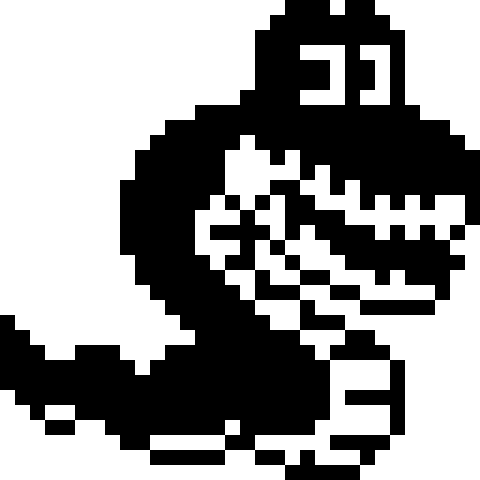

In [11]:
# with 0, 1 and 2 zero is white
grid_data = w_grid

data = [[0 if x==1 else 1 for x in row] for row in grid_data]
img = Image.new('1', (len(data[0]), len(data)))
img.putdata([x for line in data for x in line])
size = 500 // max(len(data), len(data[0]))
img = img.resize((len(data[0])*size, len(data)*size))
img.save('nonogram.png')
im('nonogram.png')